<a href="https://colab.research.google.com/github/rodrigoviana-ds/Projetos/blob/main/modelo_regressao_linear_saude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Previsão do Custo de Plano de Saúde por Pessoa**
#**Medical Cost Data**



#Importação dos Dados

In [180]:
import pandas as pd

In [181]:
caminho = '/content/insurance.csv'
dados = pd.read_csv(caminho)

In [182]:
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [183]:
dados.describe().round(2)

,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


In [184]:
dados.shape

(1338, 7)

In [ ]:
#Instalando biblioteca de visualização
!pip install sweetviz

In [186]:
#Importando biblioteca

import sweetviz

In [ ]:
#Criando um arquivo html com Análise de Dados

eda = sweetviz.analyze([dados, "Seguro Saúde"], target_feat = "charges")
eda.show_html()

#**Pré Processamento dos Dados**


*   Variável smoker (fumente): 0 (não) e 1 (sim)
*   Variável resposta na escala para cada mil dólares



In [188]:
dados['smoker'] = dados['smoker'].map({'yes': 1, 'no': 0})
dados['charges'] = dados['charges']/1000

#**Variáveis Consideradas no Modelo**


*   BMI: Índice de Massa Corporal
*   Smoker: fumante ou não
*   Charges: custos




In [189]:
dados = dados[['bmi', 'smoker', 'charges']]
dados.head().round(2)

,bmi,smoker,charges
0,27.90,1,16.88
1,33.77,0,1.73
2,33.00,0,4.45
3,22.70,0,21.98
4,28.88,0,3.87


#**Gráficos Pertinentes**

##**Dispersão Entre Fumantes e BMI**

In [190]:
import seaborn as sns

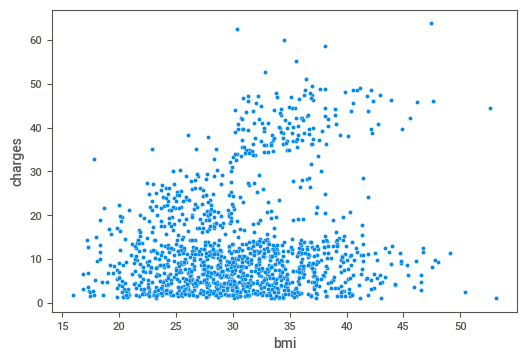

In [191]:
sns.scatterplot(x = 'bmi', y = 'charges', data = dados);

#A dispersão não sugere relação linear entre as variáveis

#**Categorizando Fumantes na Dispersão**

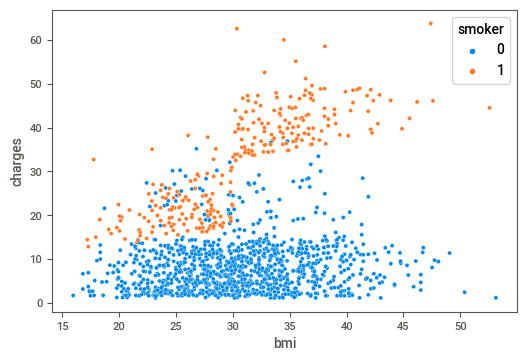

In [192]:
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = dados);


#**Separando a Variável Dependente da Independente**

In [193]:
X = dados[['bmi', 'smoker']]
y = dados['charges']

#**Método de Validação: Holdout**

*   25% dos dados para teste
*   75% dos dados para treinamento



In [170]:
import pandas as pd

In [194]:
from sklearn.model_selection import train_test_split

Xtreino, Xteste, ytreino, yteste = train_test_split(X, y, test_size = 0.25)

In [195]:
Xteste.shape
Xtreino.shape

print(Xtreino.shape)
print(Xteste.shape)

(1003, 2)
(335, 2)


In [196]:
Xtreino.head()

,bmi,smoker
481,37.510,0
291,29.640,0
199,39.330,0
1016,24.605,0
901,40.920,1


#**Ajustando o Modelo de Regressão Linear**

In [174]:
pip install sklearn

In [197]:
import sklearn

In [198]:
from sklearn.linear_model import LinearRegression

#Ajuste na Amostra Treino

reg = LinearRegression()
reg.fit(Xtreino, ytreino)

#Predição da Amostra Teste

preditos = reg.predict(Xteste)

#**Predição da Amostra Teste**

In [199]:
preditos = reg.predict(Xteste)
preditos

array([ 7.02858223, 32.29619504, 33.03372088,  7.30030228,  8.11546243,
       11.45373731,  8.42804264, 10.52212572, 32.25737789,  3.37977015,
        5.32675666, 34.35350398,  3.37977015, 11.18201727,  5.68632605,
        3.0304158 , 10.87148007, 32.80081799, 34.74167548, 11.68664021,
        9.23707376, 11.49255446,  9.82137401, 29.18469403,  7.64965663,
        8.96943973, 32.42081852,  7.18385083,  8.51384897, 10.83266292,
        8.93062258,  8.77535398,  9.00417086,  7.10621653,  3.2633187 ,
        6.67514187, 31.20727183, 30.39824071, 11.88072596,  9.08589117,
        5.98051919, 29.695446  ,  8.58126823,  8.47298881,  5.08772474,
       10.44449142,  9.55169697,  9.51287982,  7.84374238,  6.13578779,
        7.14503368, 10.94911437,  7.6149255 ,  6.01933634,  9.5067508 ,
        5.82525059, 10.28922282, 11.37610302, 12.29341356, 11.04717875,
       10.59976002,  9.70696557,  9.62933127,  6.75686218,  5.82116457,
        7.57406534,  9.41685845, 13.82158345, 31.40340059,  6.95

In [200]:
import numpy as np

np.mean((preditos - yteste)**2)

51.59764404346066

#**Métrica de Avaliação: Erro Quadrático Médio (MSE)**

In [201]:
from sklearn.metrics import mean_squared_error

eqm = mean_squared_error(yteste, preditos)
print('EQM: {}'.format(round(eqm, 4)))

EQM: 51.5976


###**Coeficientes**

In [202]:
b0 = reg.intercept_
b1, b2 = reg.coef_

print('Intercepto: \n', reg.intercept_)
print('Coeficientes: \n', reg.coef_)

Intercepto: 
 -4.111939769770862
Coeficientes: 
 [ 0.40860158 23.94782971]


#**O Modelo de Regressão**

##**Nesse cenário, o modelo de regressão linear é dado por:**


*   Custos = b0 + b1.BMI + b2.0 - **Se não fumante**
*   Custos = b0 + b1.BMI + b2.1 - **Se fumante**

In [203]:
import numpy as np

x = np.arange(15, 55, 0.01)
y0 = b0 + b1*x + b2*0
y1 = b0 + b1*x + b2*1


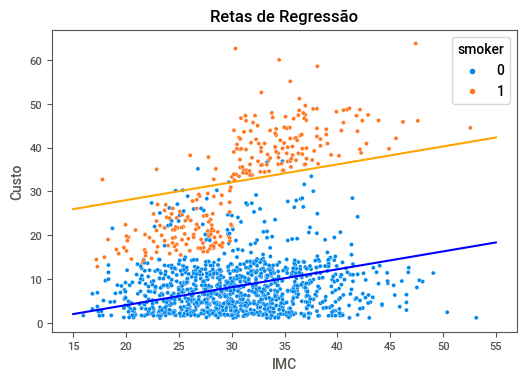

In [204]:
import matplotlib.pyplot as plt

sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = dados)
plt.plot(x, y0, color = 'blue')
plt.plot(x, y1, color = 'orange')
plt.title('Retas de Regressão')
plt.xlabel('IMC')
plt.ylabel('Custo')
plt.show()

#**Holdout Repetido**

##Repetições da técnica Holdout variando a distribuição de quem vai pra amostra de teste e treinamento.

##**Objetivo:** Obter um valor mais estável para o EQM

In [211]:
def HoldoutRep(modelo = LinearRegression(), replicas = 100, proporcao = 0.25):
    from sklearn.metrics import mean_squared_error
    from sklearn.model_selection import train_test_split 

    eqms_treino = []
    eqms_teste = []

    for i in range(replicas):
        Xtreino , Xteste, ytreino, yteste  = train_test_split(X, y, test_size = proporcao)
        
        #Treinando o Modelo
        reg = modelo
        reg.fit(Xtreino, ytreino)

        #Verificando o eqm no teste
        preditos_treino = reg.predict(Xtreino)
        eqm_treino = mean_squared_error(ytreino, preditos_treino)

        preditos_teste = reg.predict(Xteste)
        eqm_teste = mean_squared_error(yteste, preditos_teste)

        #Guardando o resultado
        eqms_treino.append(eqm_treino)
        eqms_teste.append(eqm_teste)
    
    res_treino = np.array(eqms_treino).mean().round(2)
    res_teste = np.array(eqms_teste).mean().round(2)

    print('EQM médio de TREINO: {}'.format(res_treino))
    print('EQM médio de TESTE: {}'.format(res_teste))

    return res_treino, res_teste

In [213]:
HoldoutRep(replicas=100)

EQM médio de TREINO: 50.01
EQM médio de TESTE: 50.64


(50.01, 50.64)